<a href="https://colab.research.google.com/github/Asigen93/Prediksi_Hujan_Kota_Sorong_2025-/blob/main/Prediksi_Hujan_Kota_Sorong_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# 1. Load dan gabungkan semua CSV

In [6]:
files = ["data/2021.csv", "data/2022.csv", "data/2023.csv", "data/2024.csv"]

df_list = []
for file in files:
    year = file.split("/")[-1].split(".")[0]  # Contoh: "2021"
    df = pd.read_csv(file)
    df["Tahun"] = int(year)
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)

# 2. Preprocessing: Buat kolom tanggal lengkap (yyyy-mm-01)

In [7]:
bulan_mapping = {
    "Januari": 1,
    "Februari": 2,
    "Maret": 3,
    "April": 4,
    "Mei": 5,
    "Juni": 6,
    "Juli": 7,
    "Agustus": 8,
    "September": 9,
    "Oktober": 10,
    "November": 11,
    "Desember": 12
}

# Split the 'Bulan;CurahHujan' column into 'Bulan' and 'CurahHujan'
df_all[['Bulan', 'CurahHujan']] = df_all['Bulan;CurahHujan'].str.split(';', expand=True)

df_all["BulanNum"] = df_all["Bulan"].map(bulan_mapping)
df_all["Tanggal"] = pd.to_datetime(df_all["Tahun"].astype(str) + "-" + df_all["BulanNum"].astype(str) + "-01")

# Convert 'CurahHujan' to numeric, coercing errors
df_all['CurahHujan'] = pd.to_numeric(df_all['CurahHujan'], errors='coerce')

# 3. Siapkan data sesuai format Prophet (ds = tanggal, y = curah hujan)

In [8]:
df_prophet = df_all[["Tanggal", "CurahHujan"]].rename(columns={"Tanggal": "ds", "CurahHujan": "y"})

# 4. Buat dan latih model Prophet

In [9]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpntld2pjc/u5to_u0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpntld2pjc/0femsces.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16295', 'data', 'file=/tmp/tmpntld2pjc/u5to_u0k.json', 'init=/tmp/tmpntld2pjc/0femsces.json', 'output', 'file=/tmp/tmpntld2pjc/prophet_modeleyzr2pfq/prophet_model-20250701105157.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:51:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# 5. Buat future dataframe untuk 12 bulan ke depan (2025)

In [10]:
future = model.make_future_dataframe(periods=12, freq="M")

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


# 6. Prediksi

In [11]:
forecast = model.predict(future)

# 7. Visualisasi

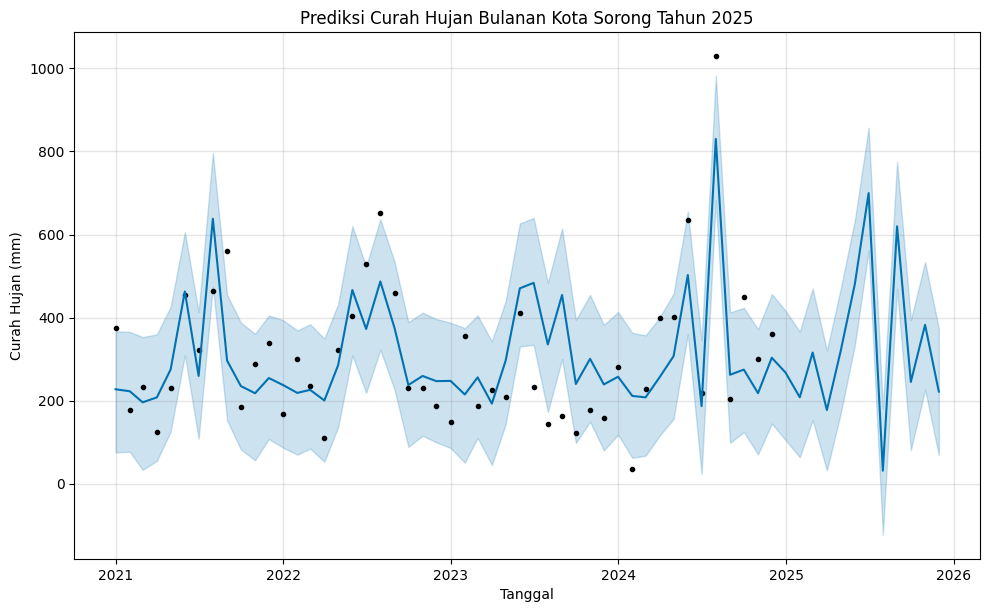

In [12]:
fig1 = model.plot(forecast)
plt.title("Prediksi Curah Hujan Bulanan Kota Sorong Tahun 2025")
plt.xlabel("Tanggal")
plt.ylabel("Curah Hujan (mm)")
plt.show()

# 8. Tampilkan tabel prediksi hanya untuk tahun 2025

In [13]:
pred_2025 = forecast[forecast["ds"].dt.year == 2025][["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(pred_2025)

           ds        yhat  yhat_lower  yhat_upper
49 2025-01-31  207.889227   63.639391  365.828809
50 2025-02-28  315.648920  152.756729  469.710712
51 2025-03-31  177.209550   31.896953  320.036090
52 2025-04-30  318.805151  168.482367  468.698531
53 2025-05-31  480.989975  333.622426  634.392103
54 2025-06-30  699.734326  561.483798  857.395557
55 2025-07-31   31.107533 -123.247313  181.569996
56 2025-08-31  619.673624  468.976350  775.029844
57 2025-09-30  244.932756   80.716580  394.207005
58 2025-10-31  382.459462  226.422149  533.459370
59 2025-11-30  221.525814   68.402622  373.567616


In [14]:
# kolom status potensi banjir
def cek_banjir(curah_hujan):
    if curah_hujan > 300:
        return "Potensi Banjir"
    else:
        return "Aman"

pred_2025["Status"] = pred_2025["yhat"].apply(cek_banjir)

# Cetak tabel prediksi dengan status
print("\nPrediksi Curah Hujan Bulanan Tahun 2025 dengan Status Potensi Banjir:\n")
print(pred_2025)


Prediksi Curah Hujan Bulanan Tahun 2025 dengan Status Potensi Banjir:

           ds        yhat  yhat_lower  yhat_upper          Status
49 2025-01-31  207.889227   63.639391  365.828809            Aman
50 2025-02-28  315.648920  152.756729  469.710712  Potensi Banjir
51 2025-03-31  177.209550   31.896953  320.036090            Aman
52 2025-04-30  318.805151  168.482367  468.698531  Potensi Banjir
53 2025-05-31  480.989975  333.622426  634.392103  Potensi Banjir
54 2025-06-30  699.734326  561.483798  857.395557  Potensi Banjir
55 2025-07-31   31.107533 -123.247313  181.569996            Aman
56 2025-08-31  619.673624  468.976350  775.029844  Potensi Banjir
57 2025-09-30  244.932756   80.716580  394.207005            Aman
58 2025-10-31  382.459462  226.422149  533.459370  Potensi Banjir
59 2025-11-30  221.525814   68.402622  373.567616            Aman


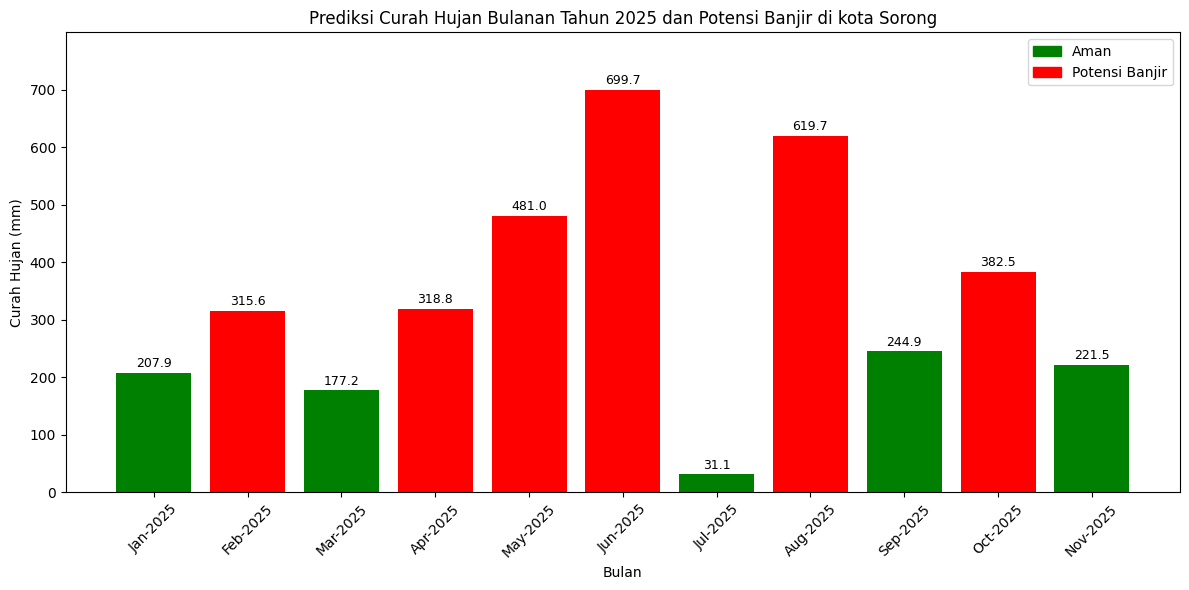

In [15]:
# Membuat warna berdasarkan status
colors = pred_2025["Status"].map({"Potensi Banjir": "red", "Aman": "green"})

plt.figure(figsize=(12,6))
bars = plt.bar(pred_2025["ds"].dt.strftime("%b-%Y"), pred_2025["yhat"], color=colors)

# Menambahkan label di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 5,
        f"{yval:.1f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Prediksi Curah Hujan Bulanan Tahun 2025 dan Potensi Banjir di kota Sorong")
plt.xlabel("Bulan")
plt.ylabel("Curah Hujan (mm)")
plt.xticks(rotation=45)
plt.ylim(0, pred_2025["yhat"].max() + 100)

# Legend manual
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Potensi Banjir')
green_patch = mpatches.Patch(color='green', label='Aman')
plt.legend(handles=[green_patch, red_patch])

plt.tight_layout()
plt.show()

In [16]:
!pip install geopandas osmnx scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 2.0 MB/s eta 0:00:00


In [19]:
import geopandas as gpd
import osmnx as ox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy.spatial import cKDTree
from shapely.geometry import Polygon

In [22]:
# Ambil batas kota Sorong
gdf_sorong = ox.geocode_to_gdf("Kota Sorong, Papua Barat, Indonesia")

# Polygon batas
poly = gdf_sorong.geometry.iloc[0]

In [23]:
def generate_random_points(polygon, num_points):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < num_points:
        p = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
        if polygon.contains(p):
            points.append(p)
    return points

In [24]:
num_points = 100        # banyak titik sampling
radius = 0.02           # radius pengaruh interpolasi
np.random.seed(42)      # supaya reproducible

In [25]:
bulan_names = [
    "Januari", "Februari", "Maret", "April",
    "Mei", "Juni", "Juli", "Agustus",
    "September", "Oktober", "November", "Desember"
]

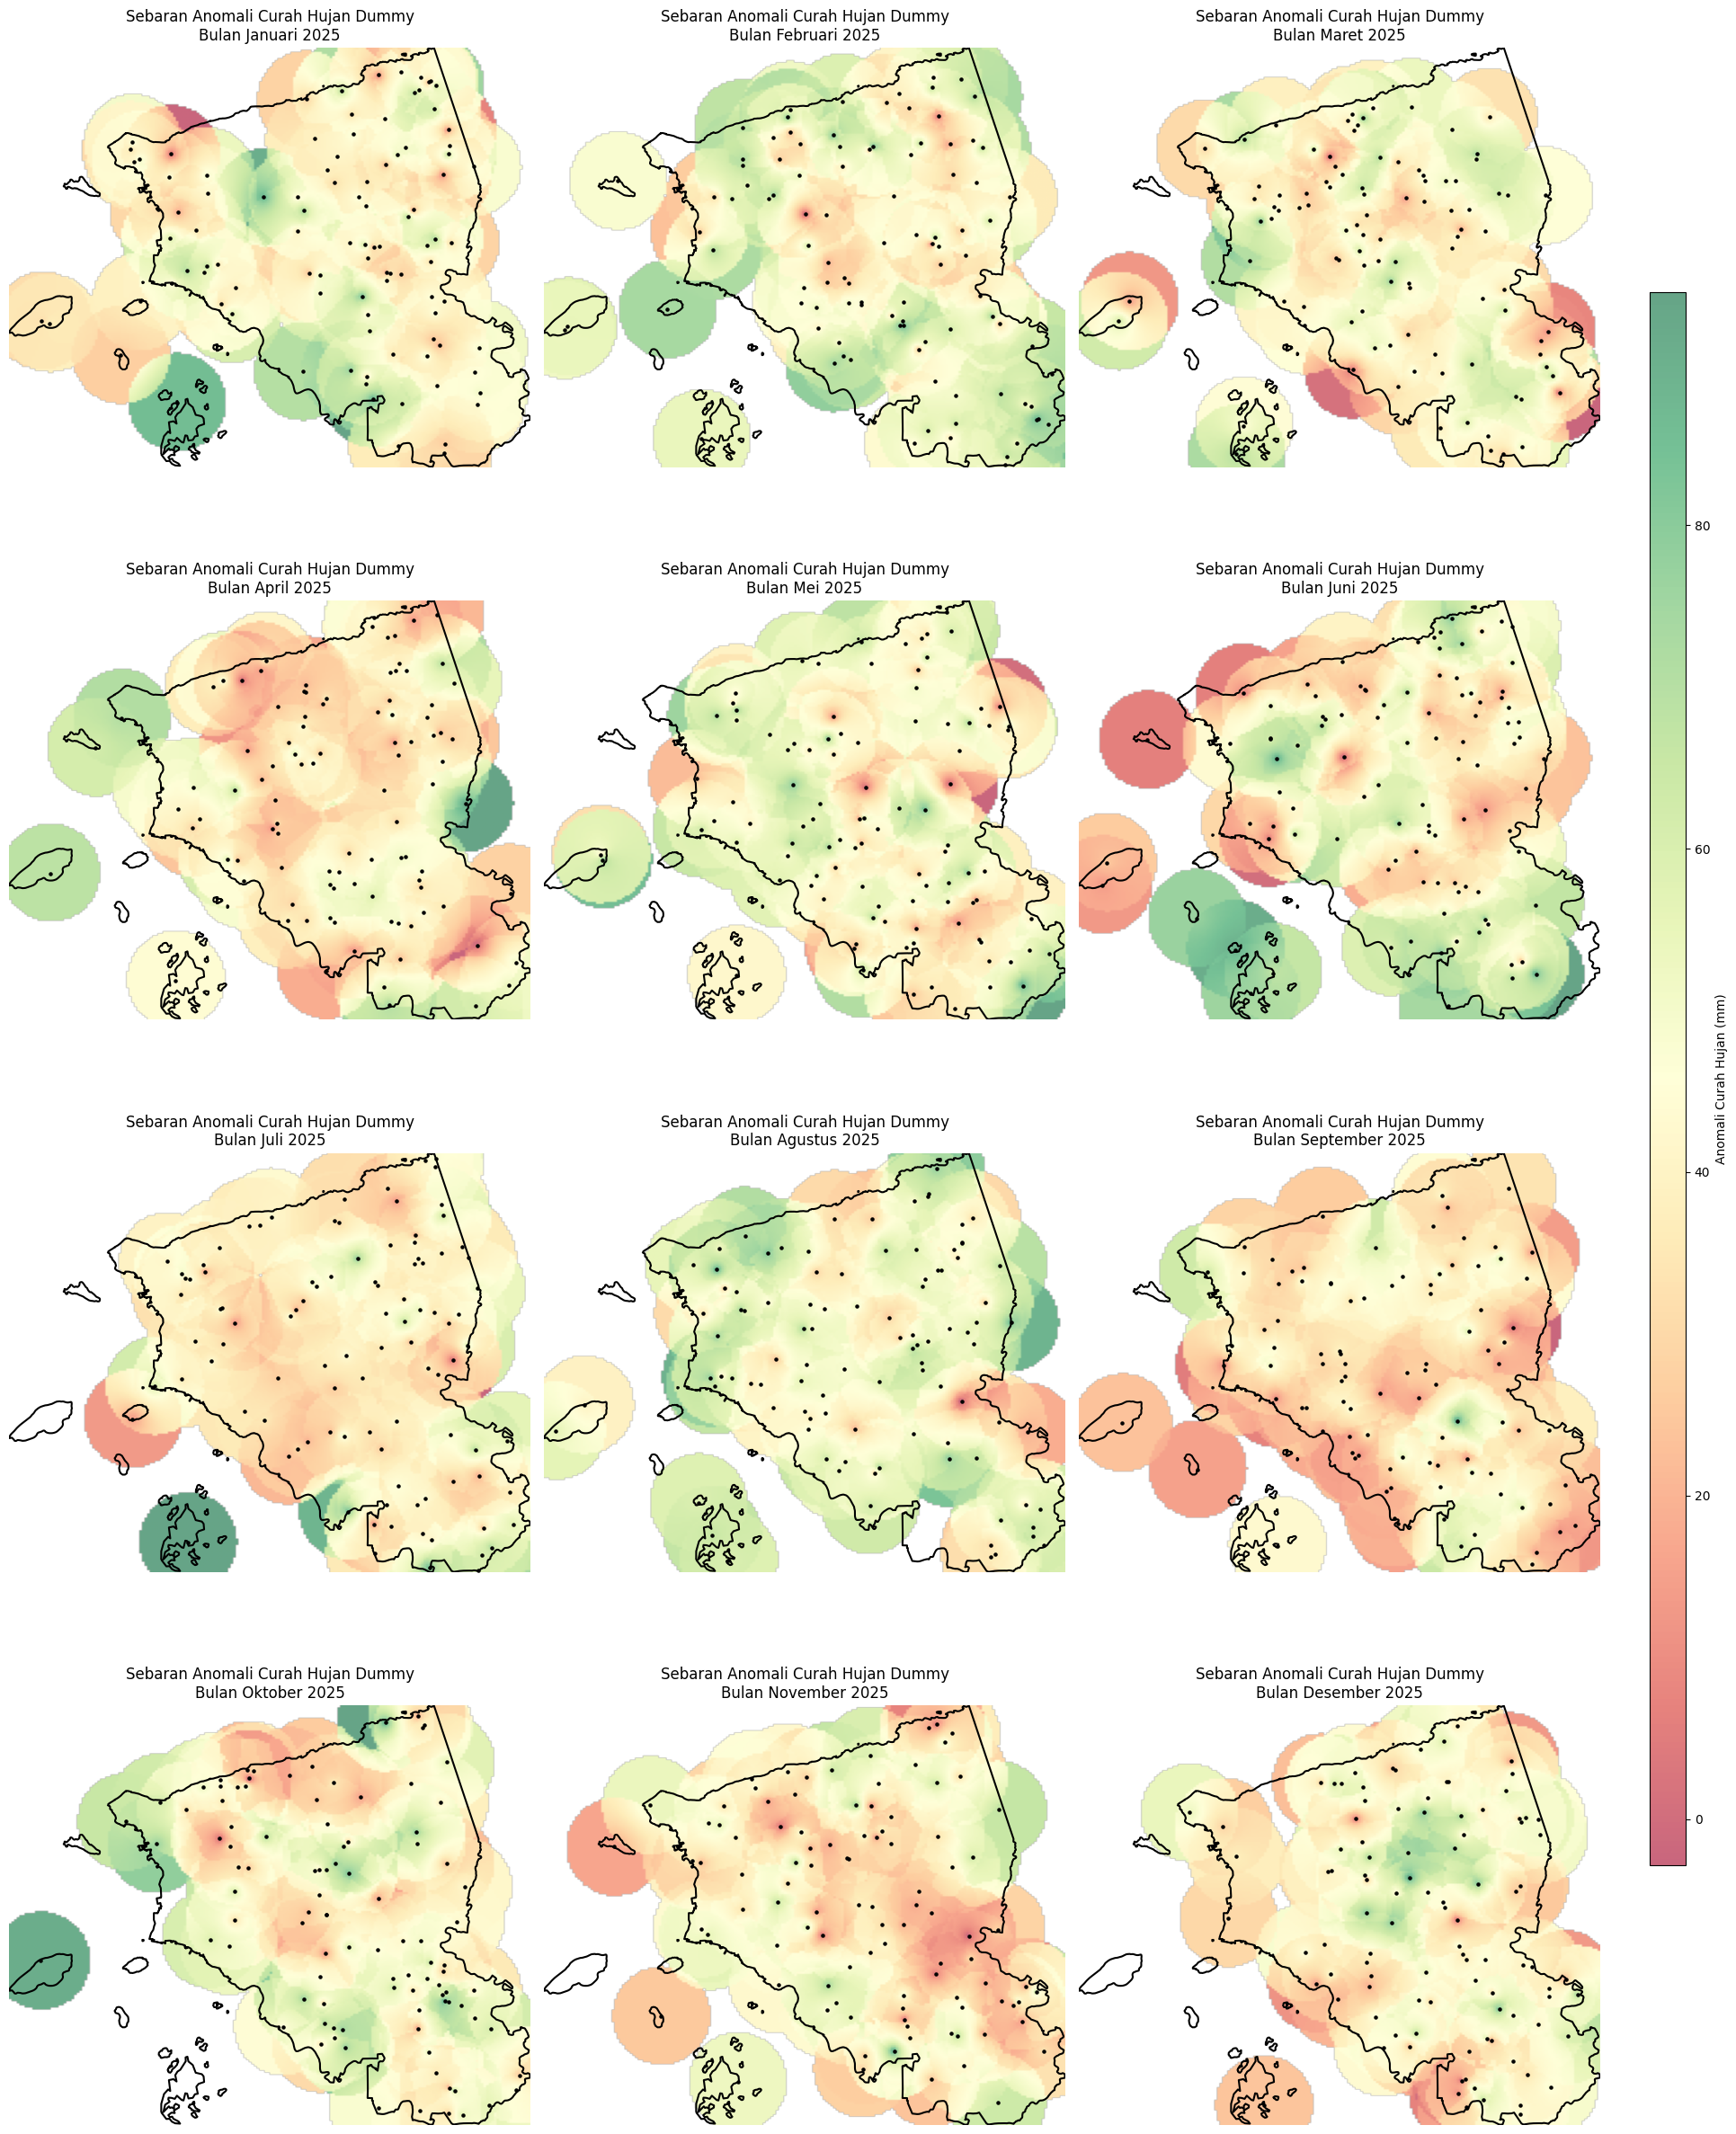

In [31]:
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
axes = axes.flatten()

# Loop 12 bulan
for i, bulan in enumerate(bulan_names):
    # Titik sampling
    random_points = generate_random_points(poly, num_points)
    gdf_points = gpd.GeoDataFrame(geometry=random_points, crs=gdf_sorong.crs)

    # Anomali dummy per bulan: base + noise
    base_anomali = np.random.uniform(20, 80)  # biar tiap bulan beda
    noise = np.random.normal(0, 20, num_points)
    anomali_values = base_anomali + noise
    gdf_points["Anomali"] = anomali_values

    # Grid
    grid_x, grid_y = np.mgrid[
        poly.bounds[0]:poly.bounds[2]:200j,
        poly.bounds[1]:poly.bounds[3]:200j
    ]
    grid_points = np.vstack((grid_x.ravel(), grid_y.ravel())).T

    # Koordinat sampling
    sample_coords = np.array([[p.x, p.y] for p in gdf_points.geometry])
    sample_values = gdf_points["Anomali"].values

    # KDTree
    tree = cKDTree(sample_coords)

    # Cari tetangga
    dists, idxs = tree.query(grid_points, k=5, distance_upper_bound=radius)

    # Initialize weighted_values array with NaN
    weighted_values = np.full(len(grid_points), np.nan)

    # Find where at least one neighbor was found within the radius
    valid_points_mask = ~np.all(dists == np.inf, axis=1)
    valid_grid_points_idxs = np.where(valid_points_mask)[0]

    # Process only the grid points with valid neighbors
    for j in valid_grid_points_idxs:
        # Get valid distances and indices for the current grid point
        valid_dists_j = dists[j][dists[j] != np.inf]
        valid_idxs_j = idxs[j][dists[j] != np.inf]

        # Calculate weights and perform weighted average
        weights_j = 1 / (valid_dists_j + 1e-12)
        weighted_values[j] = np.sum(weights_j * sample_values[valid_idxs_j]) / np.sum(weights_j)

    weighted_values = weighted_values.reshape(grid_x.shape)

    # Plot per bulan
    ax = axes[i]
    gdf_sorong.boundary.plot(ax=ax, color="black")
    im = ax.imshow(
        weighted_values.T,
        extent=(poly.bounds[0], poly.bounds[2], poly.bounds[1], poly.bounds[3]),
        origin="lower",
        cmap="RdYlGn",
        alpha=0.6
    )
    gdf_points.plot(ax=ax, color="black", markersize=5)
    ax.set_title(f"Sebaran Anomali Curah Hujan Dummy\nBulan {bulan} 2025")
    ax.axis("off")

# 1) rapikan subplot sebelum colorbar
fig.tight_layout(rect=[0,0,0.9,1])   # Sisakan ruang di kanan (max x=0.9)

# 2) Buat colorbar di samping kanan
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])   # Posisi di luar grid subplot
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label("Anomali Curah Hujan (mm)")

plt.show()